In [6]:
import json
import os

In [11]:
MODELS = {
    "bilstm-10": "bilstm_model_results_10_Chexpert.json",
    "bilstm-50": "bilstm_model_results_50_Chexpert.json",
    "bilstm-100": "bilstm_model_results_100_Chexpert.json",
    "lstm-10": "lstm_model_results_10_Chexpert.json",
    "lstm-50": "lstm_model_results_50_Chexpert.json",
    "lstm-100": "lstm_model_results_100_Chexpert.json",
    "gpt-10": "gpt_model_results_10_Chexpert.json",
    "gpt-50": "gpt_model_results_50_Chexpert.json",
    "gpt-100": "gpt_model_results_100_Chexpert.json",
    "gpt2-10": "gpt2_model_results_10_Chexpert.json",
    "gpt2-50": "gpt2_model_results_50_Chexpert.json",
    "gpt2-100": "gpt2_model_results_100_Chexpert.json",
    "gpt2modified-10": "gpt2_modified_model_results_10_Chexpert.json",
    "gpt2modified-50": "gpt2_modified_model_results_50_Chexpert.json",
    "gpt2modified-100": "gpt2_modified_model_results_100_Chexpert.json",
    "gpt2modifiedNOMASK-10": "gpt2_modified_model_nomask_results_10_Chexpert.json",
    "gpt2modifiedNOMASK-50": "gpt2_modified_model_nomask_results_50_Chexpert.json",
    "gpt2modifiedNOMASK-100": "gpt2_modified_model_nomask_results_100_Chexpert.json",

}
results = {}
for model_name, file_name in MODELS.items():
    with open(os.path.join("results", file_name), 'r') as f:
        results[model_name] = json.load(f)

In [12]:
# Plot barplot of results for each model for each metric
import matplotlib.pyplot as plt

metrics = list(next(iter(results.values())).keys())
metrics = [metric for metric in metrics if metric not in ["bertscore_f1", "rouge_l"]]

In [13]:
metrics

['chexbert_f1_weighted',
 'chexbert_f1_micro',
 'chexbert_f1_macro',
 'chexbert_f1_micro_5',
 'chexbert_f1_macro_5',
 'radgraph_f1_RG_E',
 'radgraph_f1_RG_ER',
 'training_time_seconds']

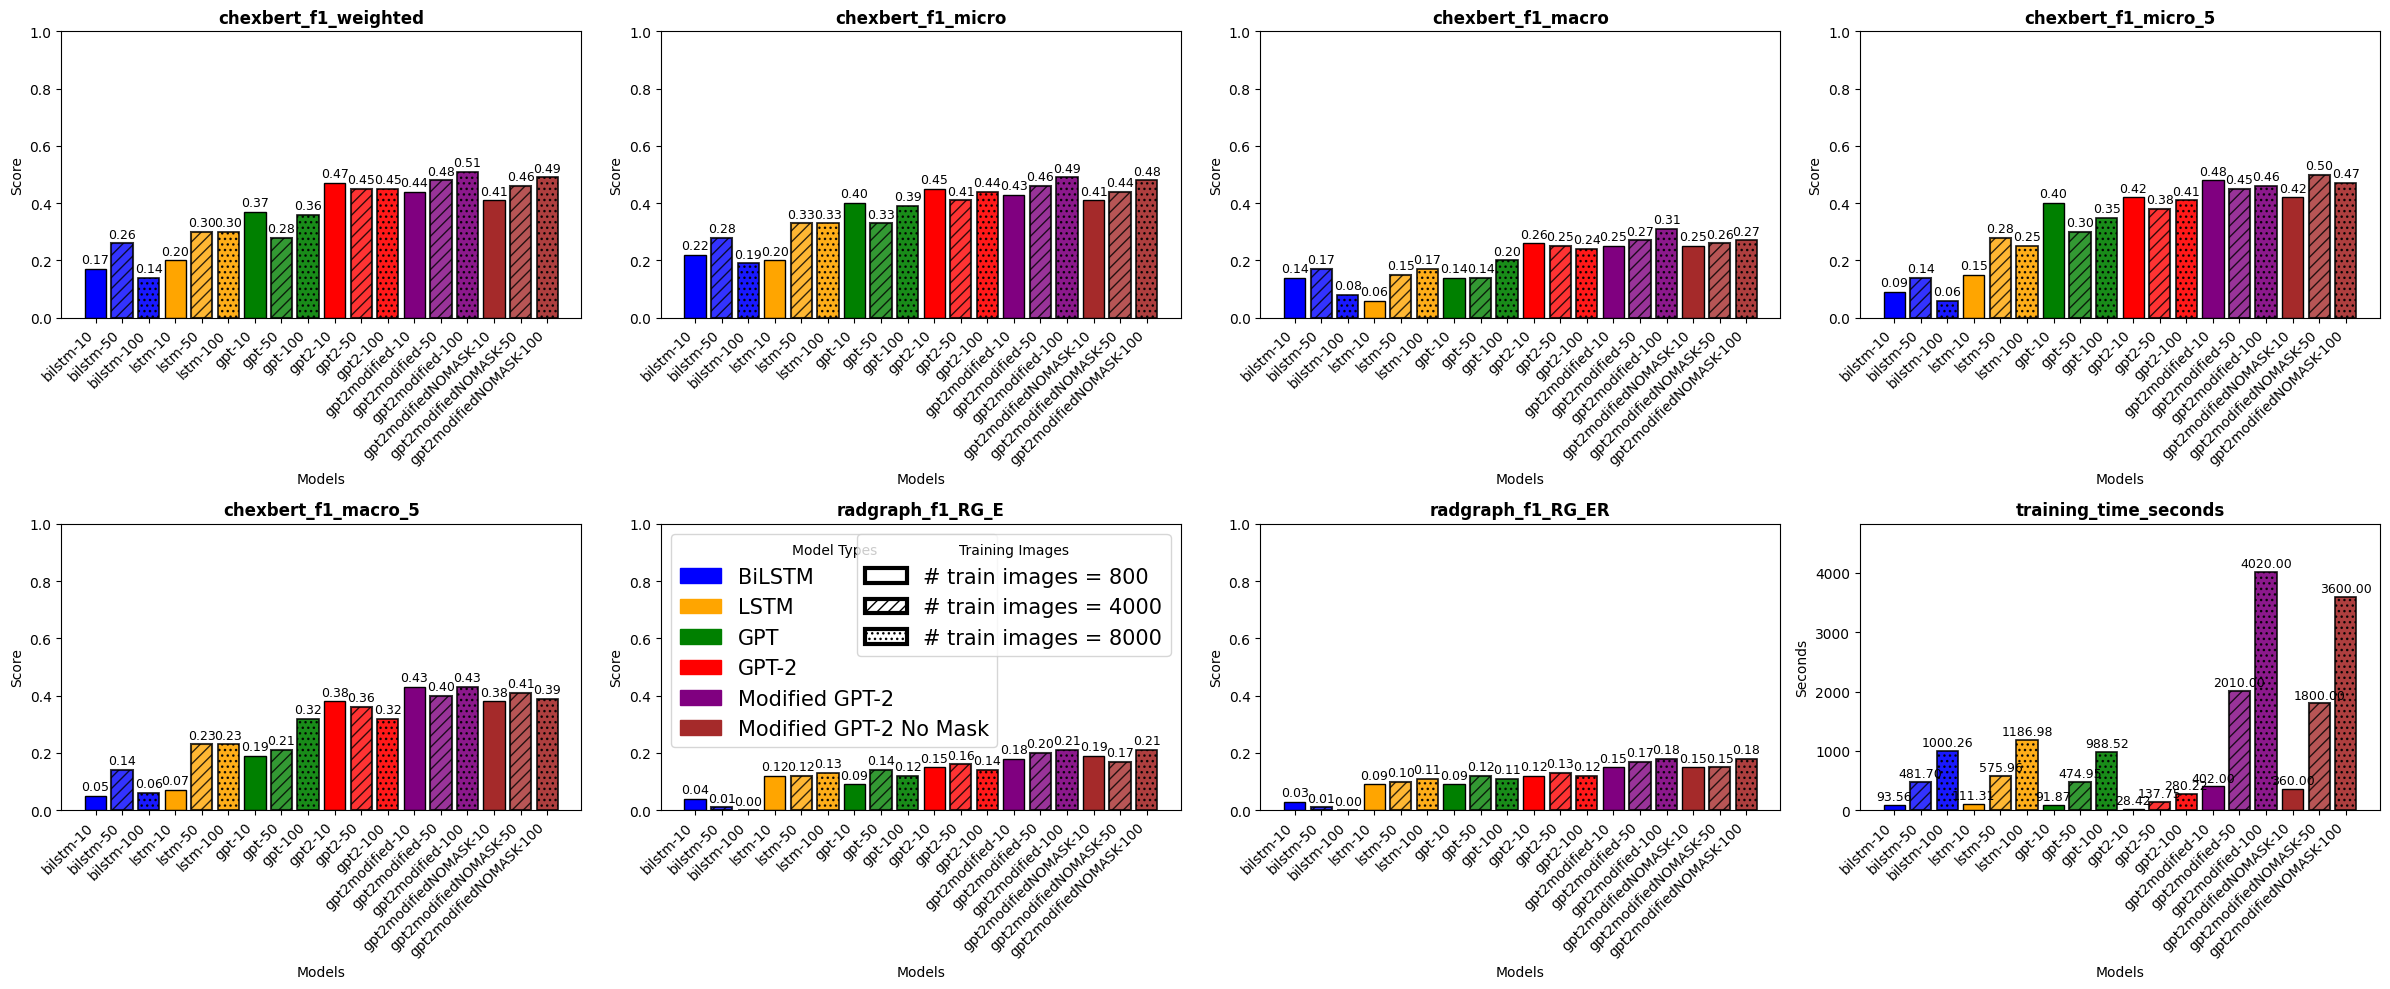

In [14]:
import matplotlib.pyplot as plt
import numpy as np

base_colors = {
    'bilstm': 'blue',
    'lstm': 'orange',
    'gpt': 'green',
    'gpt2': 'red',
    'gpt2modified': 'purple',
    'gpt2modifiedNOMASK': 'brown'
}

# Define different bar patterns for each epoch group
bar_patterns = {
    '10': {'hatch': None, 'alpha': 1.0, 'edgecolor': 'black', 'linewidth': 1},      # Full color
    '50': {'hatch': '///', 'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 1.5},  # Striped
    '100': {'hatch': '...', 'alpha': 0.9, 'edgecolor': 'black', 'linewidth': 1.2}  # Dotted
}

def get_base(model_name):
    return model_name.split('-')[0]

def get_epoch(model_name):
    return model_name.split('-')[1]

metrics = [
    'chexbert_f1_weighted', 'chexbert_f1_micro', 'chexbert_f1_macro',
    'chexbert_f1_micro_5', 'chexbert_f1_macro_5',
    'radgraph_f1_RG_E', 'radgraph_f1_RG_ER',
    'training_time_seconds'
]

fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    raw_scores = [results[model][metric] for model in MODELS.keys()]
    scores = [round(score, 2) for score in raw_scores]
    colors = [base_colors[get_base(model)] for model in MODELS.keys()]
    
    ax = axes[idx]
    
    # Create bars with different patterns based on epoch number
    bars = []
    for i, (model, score) in enumerate(zip(MODELS.keys(), scores)):
        epoch = get_epoch(model)
        pattern = bar_patterns[epoch]
        
        bar = ax.bar(i, score, 
                    color=colors[i], 
                    hatch=pattern['hatch'],
                    alpha=pattern['alpha'],
                    edgecolor=pattern['edgecolor'],
                    linewidth=pattern['linewidth'])
        bars.extend(bar)
    
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel('Models')
    ax.set_ylabel('Seconds' if metric == 'training_time_seconds' else 'Score')
    ax.set_xticks(range(len(MODELS.keys())))
    ax.set_xticklabels(list(MODELS.keys()), rotation=45, ha='right')

    # Adjust y-axis for training time
    if metric == 'training_time_seconds':
        max_time = max(scores)
        ax.set_ylim(0, max_time * 1.2)
        offset = max_time * 0.02
    else:
        ax.set_ylim(0, 1)
        offset = 0.02

    for i, score in enumerate(scores):
        ax.text(i, score + offset, f'{score:.2f}', ha='center', fontsize=9)

    # Add comprehensive legend only to the first subplot
    if idx == 5:
        # Model type legend
        model_handles = [
            plt.Rectangle((0,0),0.5,0.5, color='blue', label='BiLSTM'),
            plt.Rectangle((0,0),0.5,0.5, color='orange', label='LSTM'),
            plt.Rectangle((0,0),0.5,0.5, color='green', label='GPT'),
            plt.Rectangle((0,0),0.5,0.5, color='red', label='GPT-2'),
            plt.Rectangle((0,0),0.5,0.5, color='purple', label='Modified GPT-2'),
            plt.Rectangle((0,0),0.5,0.5, color='brown', label='Modified GPT-2 No Mask')
        ]
        
        # Pattern legend for training images - improved visibility
        from matplotlib.patches import Rectangle
        pattern_handles = []
        
        # Solid black rectangle - extra large size
        solid_rect = Rectangle((0,0),0.5,0.5, facecolor='white', edgecolor='black', linewidth=3)
        pattern_handles.append((solid_rect, '# train images = 800'))
        
        # White rectangle with black diagonal stripes - extra large size
        stripe_rect = Rectangle((0,0),0.5,0.5, facecolor='white', hatch='///', edgecolor='black', linewidth=3)
        stripe_rect.set_hatch('///')
        pattern_handles.append((stripe_rect, '# train images = 4000'))
        
        # White rectangle with black dots - extra large size
        dot_rect = Rectangle((0,0),0.5,0.5, facecolor='white', hatch='...', edgecolor='black', linewidth=3)
        dot_rect.set_hatch('...')
        pattern_handles.append((dot_rect, '# train images = 8000'))
        
        # Convert to proper legend handles
        legend_handles = [handle for handle, label in pattern_handles]
        legend_labels = [label for handle, label in pattern_handles]
        
        # Create two separate legends
        legend1 = ax.legend(handles=model_handles, loc='upper left', title='Model Types', fontsize=15)
        legend2 = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right', title='Training Images', fontsize=15)
        ax.add_artist(legend1)  # Add the first legend back

# Hide any unused subplots (if fewer than 8 metrics)
for j in range(len(metrics), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Estimate training time for 500,000 images based on current results
import pandas as pd

# Mapping of model variants to training dataset sizes
dataset_sizes = {
    '10': 800,    # 800 training images
    '50': 4000,   # 4000 training images  
    '100': 8000   # 8000 training images
}

target_images = 500000

# Calculate time per image for each model and estimate time for 500,000 images
estimations = []

for model_name in MODELS.keys():
    base_model = get_base(model_name)
    epoch_variant = get_epoch(model_name)
    
    current_training_time = results[model_name]['training_time_seconds']
    current_dataset_size = dataset_sizes[epoch_variant]
    
    # Calculate time per image (assuming linear scaling)
    time_per_image = current_training_time / current_dataset_size
    
    # Estimate time for 500,000 images
    estimated_seconds = time_per_image * target_images
    estimated_minutes = estimated_seconds / 60
    estimated_hours = estimated_minutes / 60
    estimated_days = estimated_hours / 24
    
    estimations.append({
        'Model': model_name,
        'Base Model': base_model.upper(),
        'Current Dataset Size': current_dataset_size,
        'Current Training Time (s)': current_training_time,
        'Time per Image (s)': round(time_per_image, 6),
        'Estimated Time for 500K images (s)': round(estimated_seconds, 2),
        'Estimated Time for 500K images (min)': round(estimated_minutes, 2),
        'Estimated Time for 500K images (hours)': round(estimated_hours, 2),
        'Estimated Time for 500K images (days)': round(estimated_days, 2)
    })

# Create DataFrame for better visualization
df_estimations = pd.DataFrame(estimations)

print("Summary by Base Model Type:")
print("=" * 60)

# Group by base model and show mean estimates only
summary = df_estimations.groupby('Base Model').agg({
    'Estimated Time for 500K images (hours)': 'mean',
    'Estimated Time for 500K images (days)': 'mean',
    'Time per Image (s)': 'mean'
}).round(4)

print(summary)

print("\n\nNumber of Images Trainable in 14 Days:")
print("=" * 50)

# Calculate how many images can be trained in 14 days (336 hours)
days_available = 14
hours_available = days_available * 24
seconds_available = hours_available * 3600

images_in_14_days = []
for base_model in df_estimations['Base Model'].unique():
    model_data = df_estimations[df_estimations['Base Model'] == base_model]
    
    mean_time_per_image = model_data['Time per Image (s)'].mean()
    mean_images = int(seconds_available / mean_time_per_image)
    
    images_in_14_days.append({
        'Base Model': base_model,
        'Mean Images (14 days)': f"{mean_images:,} ({mean_images/1000:.0f}K)"
    })

df_images_14_days = pd.DataFrame(images_in_14_days)
print(df_images_14_days.to_string(index=False))

Summary by Base Model Type:
            Estimated Time for 500K images (hours)  \
Base Model                                           
BILSTM                                     16.8967   
GPT                                        20.6167   
GPT2                                       20.2333   
LSTM                                       20.0867   

            Estimated Time for 500K images (days)  Time per Image (s)  
Base Model                                                             
BILSTM                                     0.7033              0.1216  
GPT                                        0.8600              0.1484  
GPT2                                       0.8433              0.1457  
LSTM                                       0.8367              0.1446  


Number of Images Trainable in 14 Days:
Base Model Mean Images (14 days)
    BILSTM     9,944,478 (9944K)
      LSTM     8,363,757 (8364K)
       GPT     8,148,911 (8149K)
      GPT2     8,302,674 (8303K)


In [ ]:
# Create visualization showing only base model means
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Calculate means for each base model
base_model_data = []
for base_model in ['BILSTM', 'LSTM', 'GPT', 'GPT2']:
    model_data = df_estimations[df_estimations['Base Model'] == base_model]
    
    mean_hours = model_data['Estimated Time for 500K images (hours)'].mean()
    mean_days = model_data['Estimated Time for 500K images (days)'].mean()
    mean_time_per_image = model_data['Time per Image (s)'].mean()
    
    # Calculate mean 14-day capacity
    mean_images_14_days = int((14 * 24 * 3600) / mean_time_per_image)
    
    base_model_data.append({
        'Base Model': base_model,
        'Mean Hours (500K)': mean_hours,
        'Mean Days (500K)': mean_days,
        'Mean Images (14 days)': mean_images_14_days
    })

base_df = pd.DataFrame(base_model_data)

# Colors for base models
base_model_colors = ['blue', 'orange', 'green', 'red']
base_models = base_df['Base Model'].tolist()

# Plot 1: Training time in hours for 500K images
ax1 = axes[0]
hours_data = base_df['Mean Hours (500K)'].tolist()
bars1 = ax1.bar(base_models, hours_data, color=base_model_colors, alpha=0.8, edgecolor='black', linewidth=2)

ax1.set_title('Mean Training Time for 500,000 Images (Hours)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Base Model Types')
ax1.set_ylabel('Hours')

# Add value labels on bars
for i, hour_val in enumerate(hours_data):
    ax1.text(i, hour_val + max(hours_data) * 0.02, f'{hour_val:.1f}h', ha='center', fontsize=11, fontweight='bold')

# Plot 2: Training time in days for 500K images
ax2 = axes[1]
days_data = base_df['Mean Days (500K)'].tolist()
bars2 = ax2.bar(base_models, days_data, color=base_model_colors, alpha=0.8, edgecolor='black', linewidth=2)

ax2.set_title('Mean Training Time for 500,000 Images (Days)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Base Model Types')
ax2.set_ylabel('Days')

# Add value labels on bars
for i, day_val in enumerate(days_data):
    ax2.text(i, day_val + max(days_data) * 0.02, f'{day_val:.1f}d', ha='center', fontsize=11, fontweight='bold')

# Plot 3: Number of images trainable in 14 days
ax3 = axes[2]
images_data = base_df['Mean Images (14 days)'].tolist()
bars3 = ax3.bar(base_models, images_data, color=base_model_colors, alpha=0.8, edgecolor='black', linewidth=2)

ax3.set_title('Mean Images Trainable in 14 Days', fontsize=14, fontweight='bold')
ax3.set_xlabel('Base Model Types')
ax3.set_ylabel('Number of Images')

# Set y-axis to 100k increments
max_images_mean = max(images_data)
y_max = ((max_images_mean // 100000) + 1) * 100000
ax3.set_ylim(0, y_max * 1.2)

# Add value labels on bars
for i, img_count in enumerate(images_data):
    ax3.text(i, img_count + max_images_mean * 0.02, f'{int(img_count/1000)}K', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary table
print("\nBase Model Performance Summary:")
print("=" * 70)
for _, row in base_df.iterrows():
    print(f"{row['Base Model']:<8}: {row['Mean Hours (500K)']:>6.1f}h | {row['Mean Days (500K)']:>5.1f}d | {row['Mean Images (14 days)']:>7,} images")

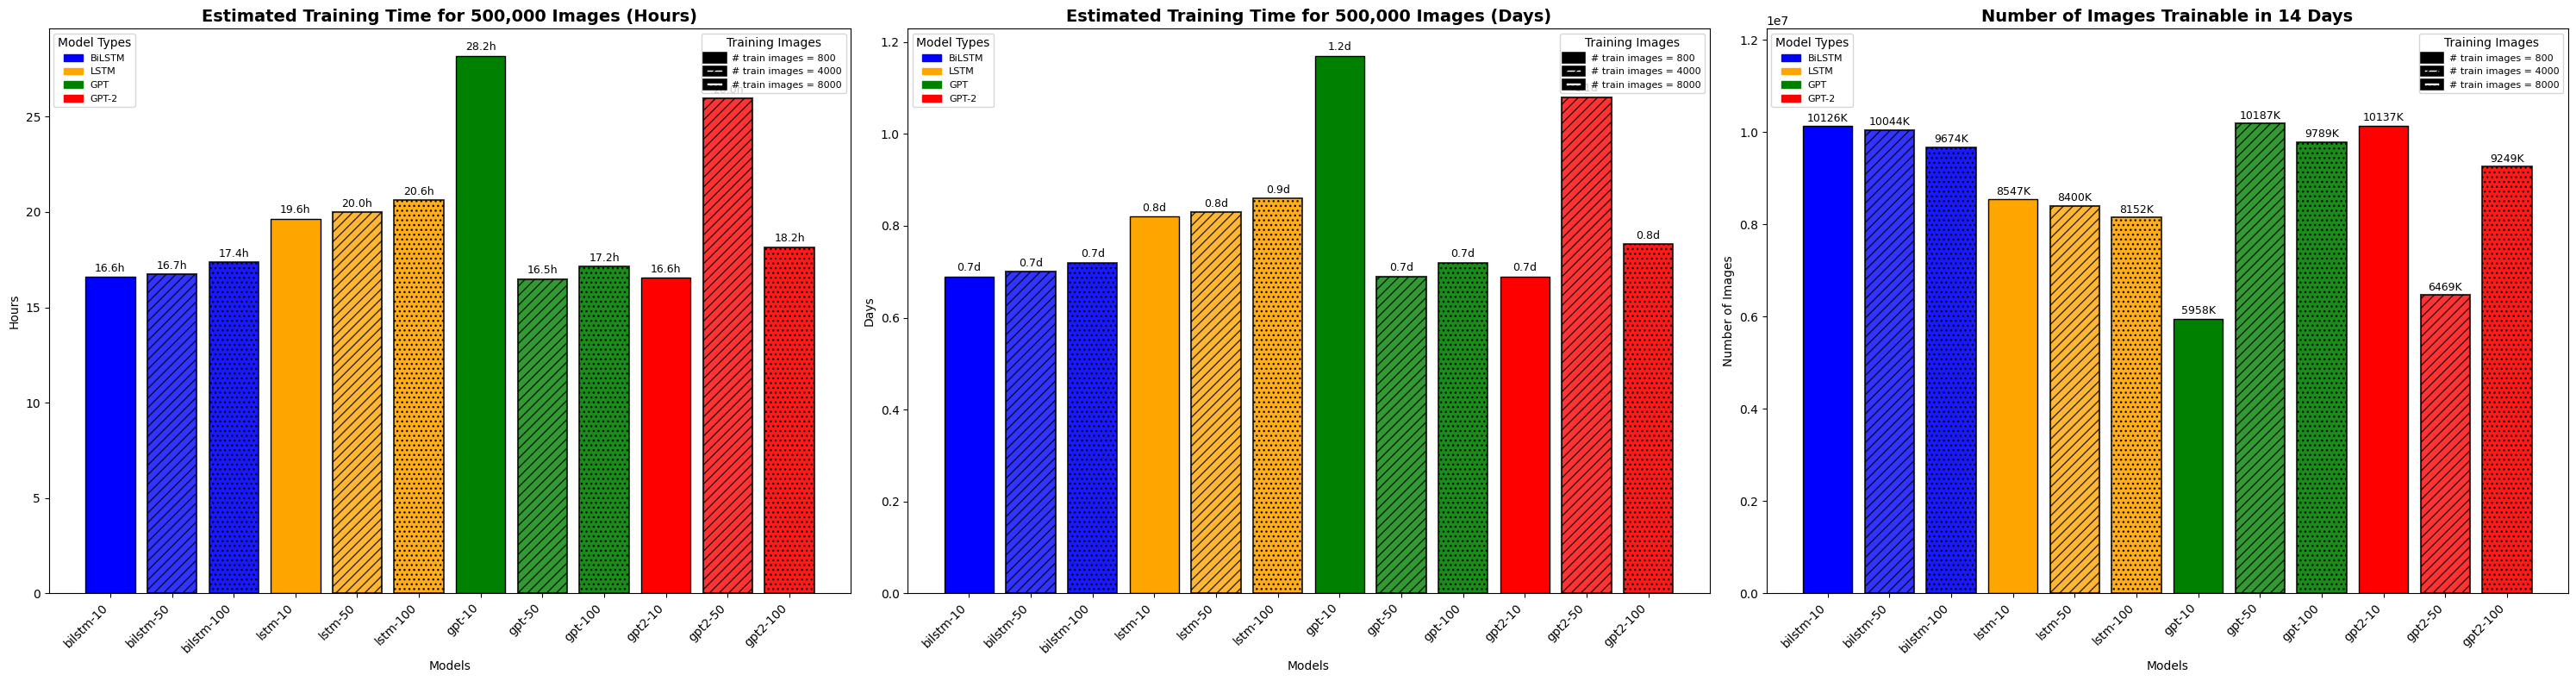


Key Insights for training on 500,000 images:
Fastest model: gpt-50 - 16.5 hours (0.7 days)
Slowest model: gpt-10 - 28.2 hours (1.2 days)
Time difference: 11.7 hours (0.5 days)
Speed improvement: 1.7x faster

Key Insights for 14-day training capacity:
Highest capacity: gpt-50 - 10,187,048 images (10187K)
Lowest capacity: gpt-10 - 5,958,415 images (5958K)
Capacity difference: 4,228,633 images (4229K)
Capacity ratio: 1.7x more images

Average 14-day capacity by model type:
----------------------------------------
BILSTM: 9,948,417 images (9948K)
LSTM: 8,366,959 images (8367K)
GPT: 8,644,881 images (8645K)
GPT2: 8,618,780 images (8619K)


In [ ]:
# Visualize the training time estimations for 500,000 images and 14-day capacity
fig, axes = plt.subplots(1, 3, figsize=(30, 8))

# Extract data for plotting
models = df_estimations['Model'].tolist()
hours = df_estimations['Estimated Time for 500K images (hours)'].tolist()
days = df_estimations['Estimated Time for 500K images (days)'].tolist()

# Calculate images trainable in 14 days for each model
days_available = 14
seconds_available = days_available * 24 * 3600
images_14_days = []
for model in models:
    time_per_image = df_estimations[df_estimations['Model'] == model]['Time per Image (s)'].values[0]
    max_images = int(seconds_available / time_per_image)
    images_14_days.append(max_images)

# Get colors and patterns for consistency
colors = [base_colors[get_base(model)] for model in models]
patterns = [bar_patterns[get_epoch(model)] for model in models]

# Plot 1: Training time in hours
ax1 = axes[0]
bars1 = []
for i, (model, hour_val) in enumerate(zip(models, hours)):
    epoch = get_epoch(model)
    pattern = bar_patterns[epoch]
    
    bar = ax1.bar(i, hour_val, 
                 color=colors[i], 
                 hatch=pattern['hatch'],
                 alpha=pattern['alpha'],
                 edgecolor=pattern['edgecolor'],
                 linewidth=pattern['linewidth'])
    bars1.extend(bar)

ax1.set_title('Estimated Training Time for 500,000 Images (Hours)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Models')
ax1.set_ylabel('Hours')
ax1.set_xticks(range(len(models)))
ax1.set_xticklabels(models, rotation=45, ha='right')

# Add value labels on bars
for i, hour_val in enumerate(hours):
    ax1.text(i, hour_val + max(hours) * 0.01, f'{hour_val:.1f}h', ha='center', fontsize=9)

# Plot 2: Training time in days
ax2 = axes[1]
bars2 = []
for i, (model, day_val) in enumerate(zip(models, days)):
    epoch = get_epoch(model)
    pattern = bar_patterns[epoch]
    
    bar = ax2.bar(i, day_val, 
                 color=colors[i], 
                 hatch=pattern['hatch'],
                 alpha=pattern['alpha'],
                 edgecolor=pattern['edgecolor'],
                 linewidth=pattern['linewidth'])
    bars2.extend(bar)

ax2.set_title('Estimated Training Time for 500,000 Images (Days)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Models')
ax2.set_ylabel('Days')
ax2.set_xticks(range(len(models)))
ax2.set_xticklabels(models, rotation=45, ha='right')

# Add value labels on bars
for i, day_val in enumerate(days):
    ax2.text(i, day_val + max(days) * 0.01, f'{day_val:.1f}d', ha='center', fontsize=9)

# Plot 3: Number of images trainable in 14 days
ax3 = axes[2]
bars3 = []
for i, (model, img_count) in enumerate(zip(models, images_14_days)):
    epoch = get_epoch(model)
    pattern = bar_patterns[epoch]
    
    bar = ax3.bar(i, img_count, 
                 color=colors[i], 
                 hatch=pattern['hatch'],
                 alpha=pattern['alpha'],
                 edgecolor=pattern['edgecolor'],
                 linewidth=pattern['linewidth'])
    bars3.extend(bar)

ax3.set_title('Number of Images Trainable in 14 Days', fontsize=14, fontweight='bold')
ax3.set_xlabel('Models')
ax3.set_ylabel('Number of Images')
ax3.set_xticks(range(len(models)))
ax3.set_xticklabels(models, rotation=45, ha='right')

# Set y-axis to 100k increments
max_images = max(images_14_days)
y_max = ((max_images // 100000) + 1) * 100000  # Round up to next 100k
ax3.set_ylim(0, y_max*1.2)

# Add value labels on bars
for i, img_count in enumerate(images_14_days):
    ax3.text(i, img_count + max_images * 0.01, f'{int(img_count/1000)}K', ha='center', fontsize=9)

# Add legends to all plots
for ax in axes:
    # Model type legend
    model_handles = [
        plt.Rectangle((0,0),1,1, color='blue', label='BiLSTM'),
        plt.Rectangle((0,0),1,1, color='orange', label='LSTM'),
        plt.Rectangle((0,0),1,1, color='green', label='GPT'),
        plt.Rectangle((0,0),1,1, color='red', label='GPT-2')
    ]
    
    # Pattern legend for training images - improved visibility
    from matplotlib.patches import Rectangle
    pattern_handles = []
    
    # Solid black rectangle - extra large size
    solid_rect = Rectangle((0,0),3,2, facecolor='black', edgecolor='black', linewidth=4)
    pattern_handles.append((solid_rect, '# train images = 800'))
    
    # White rectangle with black diagonal stripes - extra large size
    stripe_rect = Rectangle((0,0),3,2, facecolor='white', hatch='///', edgecolor='black', linewidth=4)
    stripe_rect.set_hatch('///')
    pattern_handles.append((stripe_rect, '# train images = 4000'))
    
    # White rectangle with black dots - extra large size
    dot_rect = Rectangle((0,0),3,2, facecolor='white', hatch='...', edgecolor='black', linewidth=4)
    dot_rect.set_hatch('...')
    pattern_handles.append((dot_rect, '# train images = 8000'))
    
    # Convert to proper legend handles
    legend_handles = [handle for handle, label in pattern_handles]
    legend_labels = [label for handle, label in pattern_handles]
    
    legend1 = ax.legend(handles=model_handles, loc='upper left', title='Model Types', fontsize=8)
    legend2 = ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right', title='Training Images', fontsize=8)
    ax.add_artist(legend1)

plt.tight_layout()
plt.show()

print(f"\nKey Insights for training on 500,000 images:")
print("=" * 60)
fastest_model = df_estimations.loc[df_estimations['Estimated Time for 500K images (hours)'].idxmin(), 'Model']
slowest_model = df_estimations.loc[df_estimations['Estimated Time for 500K images (hours)'].idxmax(), 'Model']
fastest_time = df_estimations['Estimated Time for 500K images (hours)'].min()
slowest_time = df_estimations['Estimated Time for 500K images (hours)'].max()

print(f"Fastest model: {fastest_model} - {fastest_time:.1f} hours ({fastest_time/24:.1f} days)")
print(f"Slowest model: {slowest_model} - {slowest_time:.1f} hours ({slowest_time/24:.1f} days)")
print(f"Time difference: {slowest_time - fastest_time:.1f} hours ({(slowest_time - fastest_time)/24:.1f} days)")
print(f"Speed improvement: {slowest_time/fastest_time:.1f}x faster")

print(f"\nKey Insights for 14-day training capacity:")
print("=" * 60)
# Find models with highest and lowest 14-day capacity
max_capacity_idx = images_14_days.index(max(images_14_days))
min_capacity_idx = images_14_days.index(min(images_14_days))
best_capacity_model = models[max_capacity_idx]
worst_capacity_model = models[min_capacity_idx]
max_capacity = max(images_14_days)
min_capacity = min(images_14_days)

print(f"Highest capacity: {best_capacity_model} - {max_capacity:,} images ({max_capacity/1000:.0f}K)")
print(f"Lowest capacity: {worst_capacity_model} - {min_capacity:,} images ({min_capacity/1000:.0f}K)")
print(f"Capacity difference: {max_capacity - min_capacity:,} images ({(max_capacity - min_capacity)/1000:.0f}K)")
print(f"Capacity ratio: {max_capacity/min_capacity:.1f}x more images")

# Average capacity by base model type
print(f"\nAverage 14-day capacity by model type:")
print("-" * 40)
for base_model in ['BILSTM', 'LSTM', 'GPT', 'GPT2']:
    base_capacities = [images_14_days[i] for i, model in enumerate(models) if get_base(model).upper() == base_model]
    avg_capacity = sum(base_capacities) / len(base_capacities)
    print(f"{base_model}: {avg_capacity:,.0f} images ({avg_capacity/1000:.0f}K)")

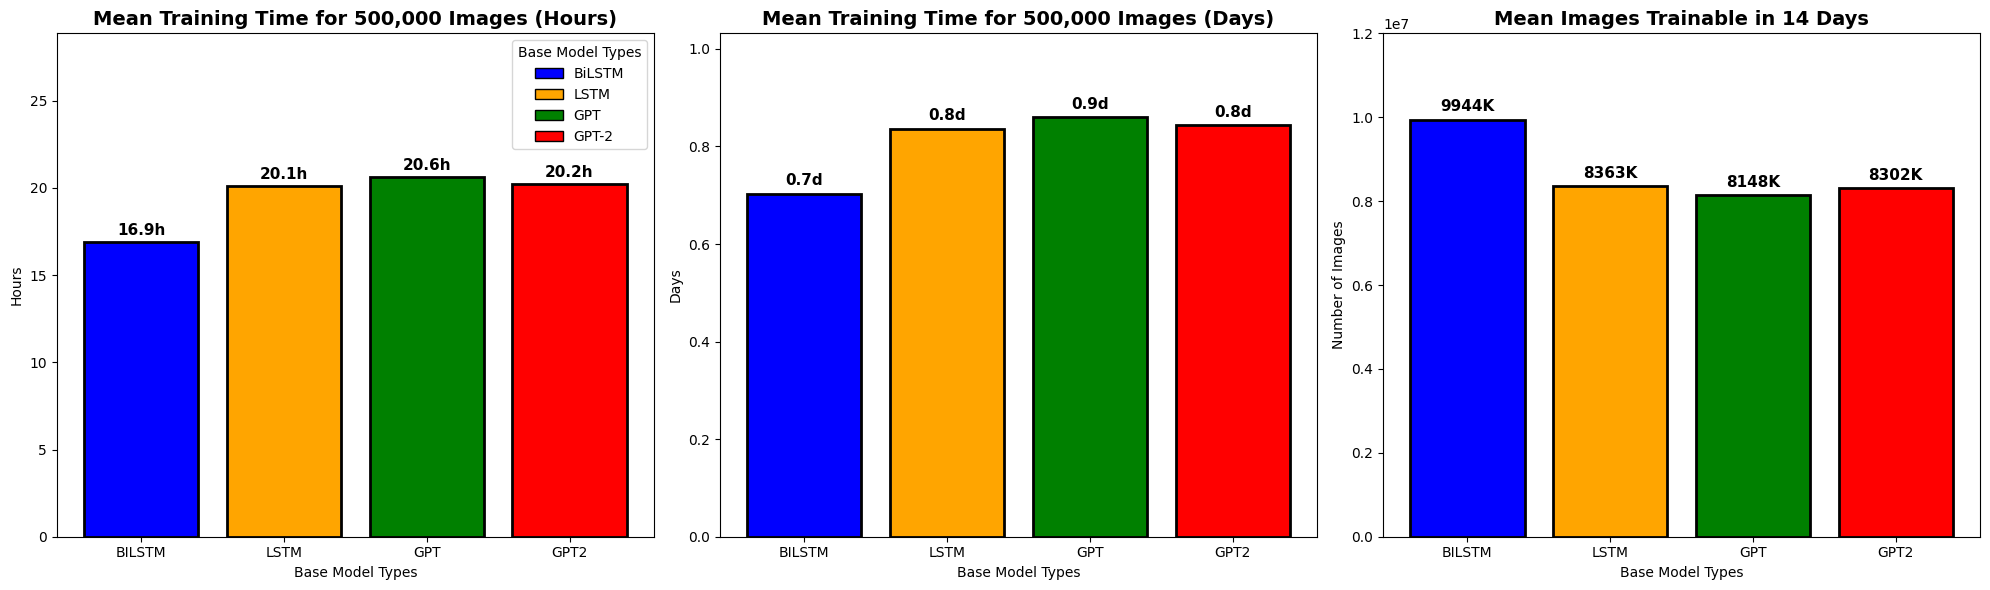


Base Model Performance Summary (Mean Values):
Model    | Hours (500K) | Days (500K) | Images (14d)
----------------------------------------------------------------------
BILSTM   |       16.9h |       0.7d |  9,944,478
LSTM     |       20.1h |       0.8d |  8,363,757
GPT      |       20.6h |       0.9d |  8,148,911
GPT2     |       20.2h |       0.8d |  8,302,674


In [ ]:
# Create visualization showing only base model means with solid colors
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Calculate means for each base model
base_model_data = []
for base_model in ['BILSTM', 'LSTM', 'GPT', 'GPT2']:
    model_data = df_estimations[df_estimations['Base Model'] == base_model]
    
    mean_hours = model_data['Estimated Time for 500K images (hours)'].mean()
    mean_days = model_data['Estimated Time for 500K images (days)'].mean()
    mean_time_per_image = model_data['Time per Image (s)'].mean()
    
    # Calculate mean 14-day capacity
    mean_images_14_days = int((14 * 24 * 3600) / mean_time_per_image)
    
    base_model_data.append({
        'Base Model': base_model,
        'Mean Hours (500K)': mean_hours,
        'Mean Days (500K)': mean_days,
        'Mean Images (14 days)': mean_images_14_days
    })

base_df = pd.DataFrame(base_model_data)

# Colors for base models - solid colors only
base_model_colors = ['blue', 'orange', 'green', 'red']
base_models = base_df['Base Model'].tolist()

# Plot 1: Training time in hours for 500K images
ax1 = axes[0]
hours_data = base_df['Mean Hours (500K)'].tolist()
max_hours_mean = max(hours_data)
ax1.set_ylim(0, max_hours_mean * 1.4)
bars1 = ax1.bar(base_models, hours_data, color=base_model_colors, alpha=1.0, edgecolor='black', linewidth=2)

ax1.set_title('Mean Training Time for 500,000 Images (Hours)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Base Model Types')
ax1.set_ylabel('Hours')

# Add value labels on bars
for i, hour_val in enumerate(hours_data):
    ax1.text(i, hour_val + max(hours_data) * 0.02, f'{hour_val:.1f}h', ha='center', fontsize=11, fontweight='bold')

# Plot 2: Training time in days for 500K images
ax2 = axes[1]
days_data = base_df['Mean Days (500K)'].tolist()
max_days_mean = max(days_data)
ax2.set_ylim(0, max_days_mean * 1.2)
bars2 = ax2.bar(base_models, days_data, color=base_model_colors, alpha=1.0, edgecolor='black', linewidth=2)

ax2.set_title('Mean Training Time for 500,000 Images (Days)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Base Model Types')
ax2.set_ylabel('Days')

# Add value labels on bars
for i, day_val in enumerate(days_data):
    ax2.text(i, day_val + max(days_data) * 0.02, f'{day_val:.1f}d', ha='center', fontsize=11, fontweight='bold')

# Plot 3: Number of images trainable in 14 days
ax3 = axes[2]
images_data = base_df['Mean Images (14 days)'].tolist()
bars3 = ax3.bar(base_models, images_data, color=base_model_colors, alpha=1.0, edgecolor='black', linewidth=2)

ax3.set_title('Mean Images Trainable in 14 Days', fontsize=14, fontweight='bold')
ax3.set_xlabel('Base Model Types')
ax3.set_ylabel('Number of Images')

# Set y-axis to 100k increments
max_images_mean = max(images_data)
y_max = ((max_images_mean // 100000) + 1) * 100000
ax3.set_ylim(0, y_max * 1.2)

# Add value labels on bars
for i, img_count in enumerate(images_data):
    ax3.text(i, img_count + max_images_mean * 0.02, f'{int(img_count/1000)}K', ha='center', fontsize=11, fontweight='bold')

# Add simple legend showing model colors
model_handles = [
    plt.Rectangle((0,0),1,1, facecolor='blue', edgecolor='black', label='BiLSTM'),
    plt.Rectangle((0,0),1,1, facecolor='orange', edgecolor='black', label='LSTM'),
    plt.Rectangle((0,0),1,1, facecolor='green', edgecolor='black', label='GPT'),
    plt.Rectangle((0,0),1,1, facecolor='red', edgecolor='black', label='GPT-2')
]

# Add legend to the first plot
axes[0].legend(handles=model_handles, loc='upper right', title='Base Model Types', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary table
print("\nBase Model Performance Summary (Mean Values):")
print("=" * 70)
print(f"{'Model':<8} | {'Hours (500K)':<12} | {'Days (500K)':<11} | {'Images (14d)':<12}")
print("-" * 70)
for _, row in base_df.iterrows():
    print(f"{row['Base Model']:<8} | {row['Mean Hours (500K)']:>10.1f}h | {row['Mean Days (500K)']:>9.1f}d | {row['Mean Images (14 days)']:>10,}")